In [12]:
import numpy as np
from matplotlib import pyplot as plt
from src.ofdm_modulator import OFDMModulator

In [13]:
rx_snrs_list = [-5, 0, 5]
subcarriers = 128
num_pilots = 8
bits_per_sym = 6
cp_ratio = 4

In [7]:
ofdm_gen = OFDMModulator(bits_per_sym=bits_per_sym, 
                         subcarriers=subcarriers, 
                         cp_ratio_numitor=cp_ratio, 
                         num_pilots=num_pilots, 
                         rx_snr=rx_snr)

allCarriers:   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
pilotCarriers: [ 0  8 16 24 32 40 48 56 63]
dataCarriers:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]


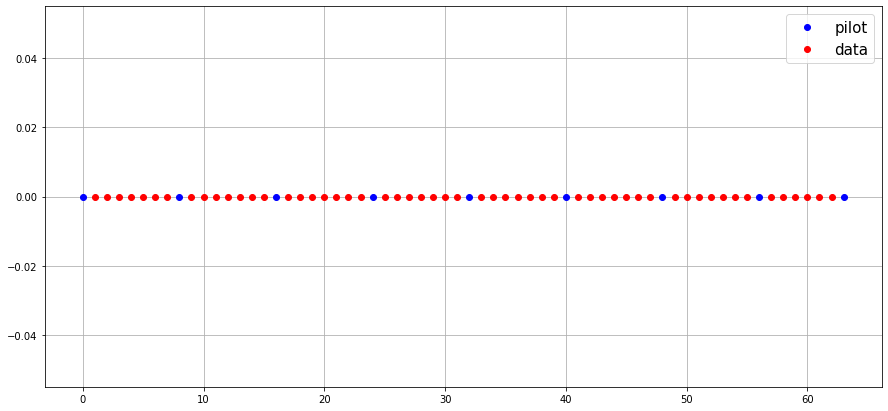

In [47]:
print ("allCarriers:   %s" % ofdm_gen.subcarriers_idxs)
print ("pilotCarriers: %s" % ofdm_gen.pilots_idxs)
print ("dataCarriers:  %s" % ofdm_gen.data_carriers_idxs)
plt.figure(figsize=(15, 7))
plt.plot(ofdm_gen.pilots_idxs, np.zeros_like(ofdm_gen.pilots_idxs), 'bo', label='pilot')
plt.plot(ofdm_gen.data_carriers_idxs, np.zeros_like(ofdm_gen.data_carriers_idxs), 'ro', label='data')
plt.legend(prop={'size': 15})
plt.grid()

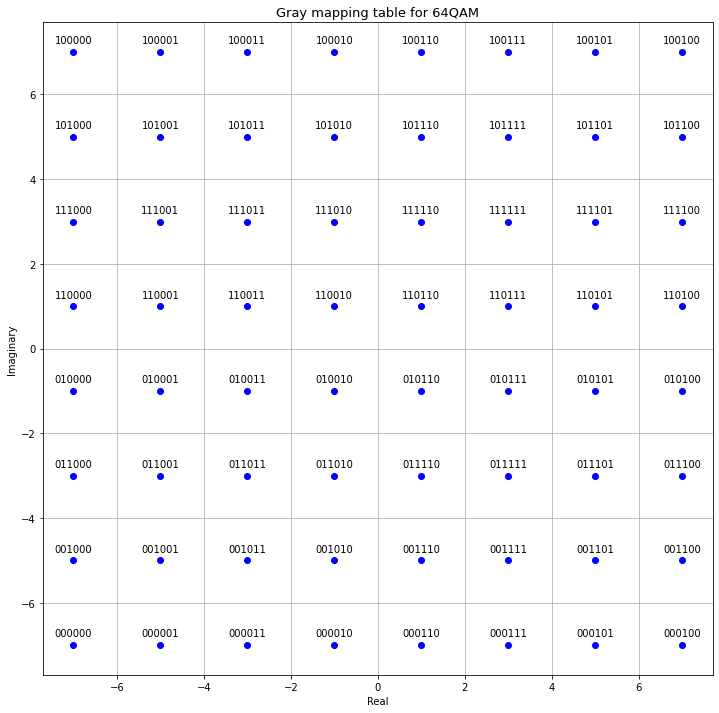

In [48]:
plt.figure(figsize=(12, 12))
plt.grid()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title(f'Gray mapping table for {2**bits_per_sym}QAM', fontsize=13)
for key in ofdm_gen.mapping_table.keys():
    Q = ofdm_gen.mapping_table[key]
    plt.plot(Q.real, Q.imag, 'bo')
    plt.text(Q.real, Q.imag+0.2, "".join(str(key)), ha='center')

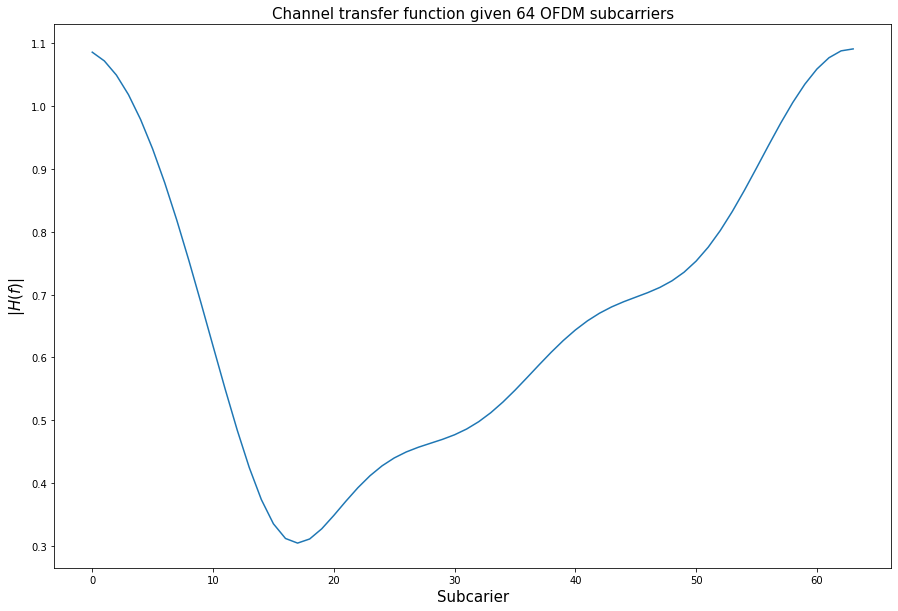

In [49]:
channelResponse = np.array([0.1, 0.2+0.17j, 0.1+0.5j, 0.412+0.051j])  # the impulse response of the wireless channel
H_exact = np.fft.fft(channelResponse, ofdm_gen.subcarriers)
plt.figure(figsize=(15,10))
plt.plot(ofdm_gen.subcarriers_idxs, abs(H_exact))
plt.xlabel('Subcarier', fontsize=15); plt.ylabel('$|H(f)|$', fontsize=15);
plt.title(f'Channel transfer function given {subcarriers} OFDM subcarriers', fontsize=15)
SNRdb = 25  # signal to noise-ratio in dB at the receiver 

In [50]:
ofdm_sign = np.array([])
for i in range(200):
    payload, flag = ofdm_gen.generate_payload()
    print(payload, flag)
    qam_load = ofdm_gen.map_words_2_qam(payload)
    ofdm_sym = ofdm_gen.ofdm_symbol(qam_load, flag)
    ofdm_ift = ofdm_gen.ofdm_idft(ofdm_sym)
    if not flag:
        ofdm_wcp = ofdm_gen.add_cyclic_prefix(ofdm_ift)
        ofdm_sign = np.append(ofdm_wcp, ofdm_sign, 0)
    else:
        ofdm_sign = np.append(ofdm_ift, ofdm_sign, 0)
    # qam_load
print(ofdm_sign)

[[1 1 1 0 0 1]
 [0 1 1 1 0 1]
 [1 0 1 0 0 1]
 [0 0 0 1 1 0]
 [1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [0 0 1 0 1 0]
 [1 0 1 1 1 1]
 [1 0 0 1 1 1]
 [0 0 1 1 0 0]
 [0 0 0 0 1 1]
 [1 1 1 0 1 1]
 [1 0 0 0 0 1]
 [0 1 0 0 0 1]
 [1 0 1 0 1 0]
 [1 1 0 1 0 1]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 0 1 0 0]
 [1 0 0 1 1 1]
 [0 0 1 1 1 1]
 [1 1 0 1 1 0]
 [1 1 1 0 1 1]
 [0 1 0 1 1 1]
 [0 1 1 0 1 1]
 [1 0 1 1 0 0]
 [1 0 0 0 1 1]
 [1 0 0 0 1 1]
 [0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [0 0 1 1 1 0]
 [1 0 1 0 1 1]
 [1 0 1 0 1 0]
 [0 1 1 0 0 0]
 [1 1 0 1 1 0]
 [0 1 0 0 1 0]
 [0 1 1 1 1 0]
 [0 0 1 0 1 0]
 [0 1 0 0 0 1]
 [0 1 0 1 1 0]
 [1 0 1 1 1 1]
 [0 0 0 0 0 0]
 [0 1 0 0 0 1]
 [1 0 0 1 1 0]
 [1 0 1 1 1 1]
 [0 0 0 1 0 1]
 [0 1 0 1 1 1]
 [0 1 0 0 1 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 1]
 [1 0 1 0 1 1]
 [0 0 1 1 1 1]
 [0 1 0 1 0 1]
 [0 1 0 0 0 1]] 1
[[1 0 0 1 0 0]
 [0 0 1 0 0 1]
 [1 0 1 1 0 1]
 [0 0 1 0 0 0]
 [0 1 0 1 0 1]
 [1 1 0 0 0 1]
 [1 0 1 0 0 1]
 [0 0 1 1 1 1]
 [0 1 1 0 0 0]
 [0 1 0 1 1 1]
 [1 0 0 0 1 0]
 [0 0 0

 [1 1 1 1 1 1]] 0
[[1 0 1 0 1 0]
 [1 1 0 1 1 0]
 [1 1 0 1 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 1 1 0 0 0]
 [1 0 0 0 0 1]
 [1 1 0 1 1 1]
 [1 1 0 0 0 0]
 [1 1 0 0 1 1]
 [1 0 1 0 1 0]
 [0 0 0 1 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [0 1 0 1 0 0]
 [1 1 1 1 1 0]
 [0 0 1 1 1 1]
 [1 1 1 1 0 0]
 [1 0 1 1 0 1]
 [0 0 0 0 0 1]
 [0 1 0 1 0 0]
 [1 0 0 0 1 1]
 [0 1 1 0 0 0]
 [0 0 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 1 0 0]
 [1 0 1 1 1 0]
 [1 1 1 1 1 1]
 [1 0 1 1 0 1]
 [1 1 0 1 0 1]
 [1 0 0 1 1 1]
 [1 1 1 0 1 0]
 [1 0 0 0 0 1]
 [0 1 1 0 1 0]
 [1 0 1 1 1 1]
 [0 0 0 1 0 0]
 [1 0 0 1 0 0]
 [1 1 0 1 1 0]
 [0 1 0 1 0 1]
 [0 0 1 1 0 1]
 [0 1 0 1 0 1]
 [0 0 0 1 1 1]
 [0 0 1 0 1 1]
 [0 1 0 1 1 1]
 [0 1 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 1 1]
 [0 1 1 1 1 1]
 [0 1 0 1 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 1]
 [1 0 0 1 0 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]] 0
[[1 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 1 1]
 [0 0 0 1 0 1]
 [0 1 1 1 0 1]
 [1 0 1 1 0 1]
 [0 0 0 0 0 0]
 [1 1 1 0 0 1]
 [0 1 0 0 1 1]
 [1 0 0 1 0 0]
 [0 

 [1 1 1 0 1 1]] 1
[[0 1 1 1 1 1]
 [0 1 0 0 0 0]
 [0 1 1 0 1 0]
 [0 0 1 1 0 0]
 [0 1 1 0 0 1]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 1 1 1]
 [1 0 0 1 0 0]
 [1 0 0 1 0 1]
 [1 0 1 0 0 0]
 [0 0 0 1 1 1]
 [0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 0 1 1 0 1]
 [0 0 1 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 0 0 1]
 [0 1 0 0 1 1]
 [1 0 1 1 1 1]
 [0 1 0 0 1 0]
 [1 1 1 1 1 1]
 [1 1 0 1 0 0]
 [1 0 1 1 0 1]
 [1 0 0 0 1 0]
 [1 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 0 0 0 0]
 [1 1 0 0 0 1]
 [1 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 0 1 0 1 0]
 [1 1 1 0 0 1]
 [0 0 0 1 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 1 1]
 [0 1 1 1 1 0]
 [1 1 1 0 1 1]
 [1 0 1 1 0 1]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 1 0 0]
 [1 0 0 1 0 0]
 [0 0 1 1 1 0]
 [1 1 0 0 0 0]
 [0 1 0 1 0 1]
 [1 0 1 1 1 0]
 [0 1 0 1 0 1]
 [0 0 1 0 1 1]
 [0 0 1 0 0 1]
 [0 1 0 1 1 0]] 0
[[1 1 0 0 0 1]
 [1 0 1 1 1 1]
 [0 1 1 1 1 1]
 [0 1 0 1 0 0]
 [0 1 1 1 1 1]
 [0 0 0 0 1 0]
 [1 0 0 1 0 0]
 [1 1 0 1 1 0]
 [1 0 0 0 1 0]
 [1 1 1 1 1 0]
 [1 

In [55]:
ofdm_ift = ofdm_gen.ofdm_idft(ofdm_sign)
ofdm_wcp = ofdm_gen.add_cyclic_prefix(ofdm_ift)

In [56]:
OFDM_TX = ofdm_sign
OFDM_RX = ofdm_gen.ofdm_over_channel(OFDM_TX)

RX Signal power: 7.3010. Noise power: 0.0730


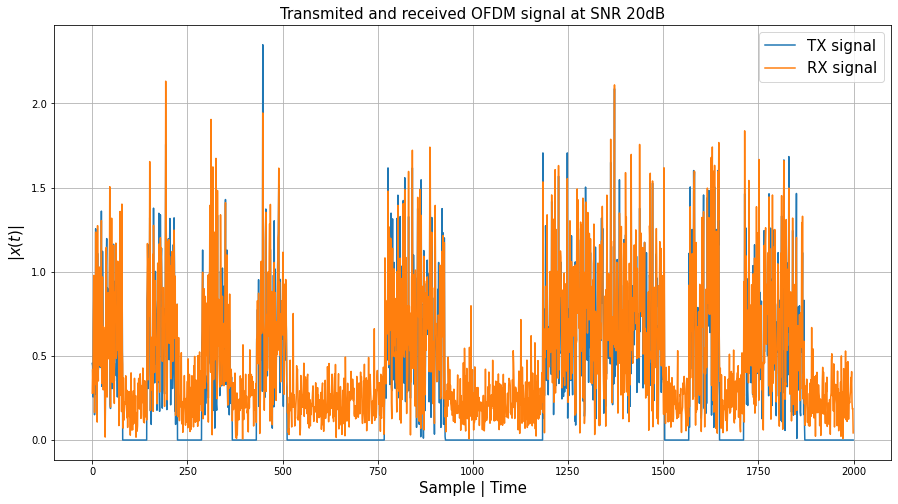

In [57]:
plt.figure(figsize=(15,8))
plt.title(f'Transmited and received OFDM signal at SNR {rx_snr}dB',
         fontsize=15)
plt.plot(abs(OFDM_TX[:2000]), label='TX signal')
plt.plot(abs(OFDM_RX[:2000]), label='RX signal')
plt.legend(fontsize=10, prop={'size': 15})
plt.xlabel('Sample | Time', fontsize=15); plt.ylabel('$|x(t)|$', fontsize=15);
plt.grid(True);

In [17]:
df['RX_OFDM'] = abs(OFDM_RX)
df['TX_OFDM'] = abs(OFDM_TX)
df.to_csv(f'E:/Faculta/Anul2/Sem1/ACP3/dataset/rx_tx_ofdm.csv')

In [14]:
import pandas as pd
df = pd.DataFrame()

In [15]:
for rx_snr in rx_snrs_list:
    ofdm_gen = OFDMModulator(bits_per_sym=bits_per_sym, 
                         subcarriers=subcarriers, 
                         cp_ratio_numitor=cp_ratio, 
                         num_pilots=num_pilots, 
                         rx_snr=rx_snr)
    ofdm_sign = np.array([])
    for i in range(100):
        payload, flag = ofdm_gen.generate_payload()
        print(payload, flag)
        qam_load = ofdm_gen.map_words_2_qam(payload)
        ofdm_sym = ofdm_gen.ofdm_symbol(qam_load, flag)
        ofdm_ift = ofdm_gen.ofdm_idft(ofdm_sym)
        ofdm_wcp = ofdm_gen.add_cyclic_prefix(ofdm_ift)
        ofdm_sign = np.append(ofdm_wcp, ofdm_sign, 0)
        # qam_load
    ofdm_ift = ofdm_gen.ofdm_idft(ofdm_sign)
    ofdm_wcp = ofdm_gen.add_cyclic_prefix(ofdm_ift)
    OFDM_TX = ofdm_sign
    OFDM_RX = ofdm_gen.ofdm_over_channel(OFDM_TX)
    df[f'{rx_snr}_TX_OFDM'] = abs(OFDM_TX)
    df[f'{rx_snr}_RX_OFDM'] = abs(OFDM_RX)
    
df.to_csv(f'E:/Faculta/Anul2/Sem1/ACP3/dataset/rx_tx_ofdm.csv', index=False)

[[1 0 0 1 1 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]
 [1 1 0 0 0 1]
 [0 1 0 1 1 0]
 [1 0 1 1 0 0]
 [1 0 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 1 1]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 1 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [1 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [1 1 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 1 0 0 0]
 [0 0 1 0 1 1]
 [0 0 1 0 0 0]
 [0 1 0 1 0 1]
 [0 0 0 1 0 1]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [1 1 0 1 1 0]
 [0 0 0 1 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 1 1]
 [1 0 0 1 0 0]
 [0 1 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 1 0 1 1 0]
 [1 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [1 0 1 0 0 1]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 1 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 1]
 [1 0 0 1 1 0]
 [1 0 0 1 0 0]
 [0 0 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 0 0 1 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 1 0 0 

 [0 0 1 0 0 0]] 1
[[0 0 0 0 0 0]
 [1 0 1 1 0 1]
 [0 0 1 1 0 0]
 [1 1 1 0 1 0]
 [0 1 0 1 0 1]
 [0 1 0 0 0 1]
 [1 0 1 1 0 1]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [0 1 0 1 1 0]
 [1 1 0 1 0 0]
 [1 0 1 0 1 0]
 [0 1 1 0 1 1]
 [0 0 0 0 1 1]
 [0 0 1 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 1 1 1 0 0]
 [0 0 0 1 0 1]
 [0 1 0 1 1 1]
 [0 0 0 1 0 1]
 [1 1 1 1 0 1]
 [0 0 1 1 1 0]
 [0 0 0 1 1 1]
 [1 0 0 1 0 0]
 [1 0 0 1 1 1]
 [0 1 1 0 0 1]
 [0 1 0 0 1 0]
 [0 1 1 0 1 1]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 1 0 0 1 0]
 [1 1 0 0 1 0]
 [1 0 1 1 0 0]
 [0 1 1 0 0 0]
 [1 0 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 0 0]
 [1 0 1 1 1 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 1]
 [1 1 0 0 1 1]
 [0 0 0 0 1 1]
 [0 0 0 1 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 1 0 0 1]
 [0 0 0 1 0 1]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 1 0]
 [1 0 0 1 1 0]
 [0 1 0 0 0 1]
 [0 1 0 1 1 0]
 [1 0 0 0 0 0]
 [0 1 1 1 0 1]
 [1 0 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 0 0 0]
 [1 1 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 1 0 1]
 [0 1 1 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0

 [0 0 0 1 1 1]] 1
[[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 1]
 [1 0 0 1 0 1]
 [0 1 1 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [1 0 0 1 0 0]
 [1 0 1 1 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 1 1]
 [1 0 0 1 1 0]
 [0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 1]
 [0 0 1 0 0 1]
 [0 0 1 1 0 0]
 [0 0 0 1 0 0]
 [0 1 1 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 1 1 0]
 [0 0 1 0 0 0]
 [0 0 1 1 0 0]
 [1 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 1 1 0 1 0]
 [0 0 0 0 1 1]
 [1 1 0 0 1 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 0 1 0 0 1]
 [0 0 0 0 0 0]
 [0 1 0 1 0 0]
 [1 0 0 0 1 0]
 [1 1 0 0 1 0]
 [1 0 0 0 1 1]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 1 1 1]
 [1 0 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 1]
 [1 0 0 0 0 0]
 [0 1 1 1 1 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [1 0 1

 [0 0 0 0 1 0]] 1
RX Signal power: 9.4080. Noise power: 0.3162
[[0 1 1 0 0 1]
 [0 0 0 0 1 0]
 [1 0 1 1 0 1]
 [0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 1 0 1 1 0]
 [0 0 0 1 0 0]
 [1 0 1 1 0 1]
 [0 0 0 0 1 0]
 [1 0 0 1 0 0]
 [0 1 0 0 0 1]
 [1 1 1 0 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 0 1 1]
 [1 1 0 1 0 0]
 [0 0 0 1 1 0]
 [0 1 0 1 0 1]
 [0 0 0 0 0 1]
 [1 0 0 1 0 0]
 [1 0 1 1 1 0]
 [1 0 1 0 0 1]
 [0 0 1 0 1 0]
 [1 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 1 1 1 0]
 [1 0 1 0 0 1]
 [1 1 0 1 0 0]
 [1 1 0 1 0 0]
 [0 1 0 0 0 1]
 [0 0 0 0 1 0]
 [1 1 0 0 1 1]
 [0 1 0 0 1 1]
 [0 1 1 0 0 0]
 [1 0 1 1 0 1]
 [0 0 0 0 0 1]
 [1 1 0 0 1 0]
 [0 1 0 0 1 1]
 [0 0 1 1 0 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 1]
 [0 0 0 1 1 0]
 [0 1 1 0 1 0]
 [1 1 0 0 1 0]
 [0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 1 1 0]
 [1 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 0 1]
 [1 0 0 0 1 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [1 1 0

[[1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 1 1 0]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 1 1 1]
 [1 0 0 1 1 0]
 [0 0 0 0 1 0]
 [0 1 1 1 0 0]
 [0 0 1 0 0 1]
 [1 1 1 0 0 1]
 [0 1 0 0 0 1]
 [0 0 0 0 1 0]
 [1 1 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [1 1 0 1 1 1]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 1 0 1 1 0]
 [0 0 0 1 1 1]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 1 0 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 1 0 1]
 [0 0 1 0 0 0]
 [1 0 0 1 1 1]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 0 0 0]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 1 1 0]
 [0 0 0 1 1 1]
 [0 0 1 0 0 0]
 [1 0 0 1 0 1]
 [0 1 0 1 0 0]
 [0 1 1 0 1 0]
 [0 1 1 1 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 1 0 0 0 1]
 [1 1 0 1 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 1 0 

[[0 1 1 1 0 1]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 1 0]
 [1 1 0 0 0 1]
 [0 0 0 0 1 1]
 [0 1 1 1 0 1]
 [1 1 0 0 1 0]
 [0 0 0 1 1 1]
 [1 1 0 1 1 1]
 [1 1 1 0 1 0]
 [0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [1 1 1 1 0 1]
 [0 0 0 0 1 0]
 [1 0 0 1 0 0]
 [1 0 1 1 0 1]
 [0 0 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 1 1 0]
 [1 0 1 0 0 0]
 [1 0 0 1 1 1]
 [0 1 0 0 0 1]
 [0 0 1 1 1 0]
 [0 0 1 0 1 0]
 [1 0 1 0 0 0]
 [1 0 0 0 1 1]
 [0 1 0 0 1 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 1 1]
 [1 0 0 0 1 1]
 [1 0 0 0 0 0]
 [1 0 1 1 1 0]
 [0 1 0 1 1 0]
 [0 0 0 0 1 0]
 [0 1 1 0 1 1]
 [0 0 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 0 1 0 1]
 [1 1 0 1 0 0]
 [1 0 0 0 0 1]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [1 0 0 1 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 1 0]
 [0 1 0 1 0 0]
 [1 0 0 1 1 0]
 [0 0 1 1 1 1]
 [0 1 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 1 0 1 1]
 [0 0 0 1 

[[0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 1 1 0 0]
 [1 0 1 0 1 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 1 0]
 [1 1 0 0 1 1]
 [0 0 0 0 0 0]
 [0 0 0 0 1 1]
 [0 1 0 1 0 0]
 [0 1 0 0 0 0]
 [1 1 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [1 0 0 0 1 0]
 [0 0 0 0 1 0]
 [1 0 0 1 0 1]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 1]
 [0 0 1 1 0 1]
 [0 0 0 1 0 1]
 [0 0 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 0 0 0]
 [1 1 1 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 1 1 0 1 0]
 [1 0 0 1 1 0]
 [0 0 1 1 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 1]
 [1 0 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 1 0]
 [0 0 0 0 0 1]
 [0 1 1 1 0 0]
 [0 1 1 1 0 0]
 [1 0 0 1 0 0]
 [0 0 1 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 

[[0 0 0 0 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 1 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 0 0 1 0]
 [0 0 0 1 0 1]
 [0 0 1 1 1 1]
 [0 0 1 0 0 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [1 1 1 0 0 0]
 [1 1 0 1 0 1]
 [0 0 0 0 0 0]
 [0 0 1 1 0 1]
 [0 0 1 0 0 0]
 [1 0 0 0 1 1]
 [1 0 0 0 1 1]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]
 [0 0 1 0 1 1]
 [1 1 0 0 1 0]
 [0 1 0 0 1 1]
 [0 0 0 1 0 1]
 [0 0 1 0 0 1]
 [0 1 1 0 0 0]
 [1 1 1 0 1 0]
 [0 0 1 1 0 1]
 [0 1 0 1 0 0]
 [0 0 0 0 1 1]
 [0 1 1 0 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 1 0]
 [0 1 0 0 0 1]
 [0 1 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 1]
 [1 1 0 1 0 0]
 [0 1 0 0 1 0]
 [1 0 1 0 0 0]
 [1 1 0 0 0 1]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 1 1]
 [1 0 1 0 0 1]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 1 1 1 0 1]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 

 [0 0 0 1 1 1]] 1
[[0 0 0 0 0 1]
 [1 0 0 1 1 0]
 [0 1 1 0 0 1]
 [0 0 1 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [1 0 0 0 0 0]
 [0 1 0 1 1 0]
 [0 0 0 1 0 1]
 [0 0 0 1 0 0]
 [0 1 0 1 1 0]
 [1 1 0 0 1 1]
 [0 0 0 0 0 0]
 [1 0 1 0 0 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 1 1 1 0]
 [0 1 1 0 1 1]
 [1 0 1 1 0 1]
 [1 0 0 0 0 0]
 [1 0 0 0 0 1]
 [1 0 0 1 0 0]
 [1 1 1 0 0 0]
 [0 0 1 0 0 1]
 [0 1 1 0 1 0]
 [1 0 0 1 0 0]
 [1 0 0 0 1 1]
 [0 1 0 1 1 0]
 [1 0 0 0 0 0]
 [0 0 1 1 1 1]
 [0 1 1 0 0 1]
 [1 0 1 1 0 1]
 [1 1 1 1 0 0]
 [0 1 0 0 1 1]
 [0 1 0 0 0 1]
 [0 0 0 0 0 0]
 [1 0 1 0 1 0]
 [0 1 1 0 0 0]
 [0 1 1 0 0 0]
 [1 1 1 1 0 0]
 [1 0 0 0 1 1]
 [1 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 1 1 1 0 0]
 [1 1 0 0 0 0]
 [0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 1]
 [0 0 0 0 0 1]
 [1 1 1 0 0 0]
 [0 1 0 1 0 0]
 [1 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 1]
 [1 0 0 1 1 0]
 [0 0 1 1 0 0]
 [1 0 0 1 0 1]
 [0 0 0 0 0 0]
 [0 1 1 0 1 1]
 [0 0 0

 [1 1 0 0 0 0]] 0
[[0 0 0 0 1 0]
 [0 0 1 1 1 0]
 [1 0 0 0 1 0]
 [0 0 0 0 0 0]
 [1 0 1 0 1 1]
 [0 0 1 0 1 1]
 [1 0 0 0 0 0]
 [1 0 0 1 0 0]
 [1 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 1 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 1]
 [0 0 0 0 0 0]
 [1 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 1 1 1 0]
 [0 0 0 0 1 0]
 [1 1 1 1 1 0]
 [0 1 0 0 1 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 1 0]
 [1 0 0 0 0 0]
 [1 1 1 1 0 0]
 [0 1 1 1 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 1 0]
 [0 1 0 0 0 1]
 [1 0 1 1 0 0]
 [0 1 1 0 1 1]
 [0 1 0 0 1 0]
 [0 0 1 0 0 0]
 [1 1 1 1 0 0]
 [0 0 0 1 1 1]
 [1 1 0 1 0 0]
 [0 0 0 0 1 1]
 [0 1 1 1 1 0]
 [1 0 0 1 1 1]
 [0 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [1 1 0 0 0 0]
 [0 0 0 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 0 0]
 [0 1 0 0 1 0]
 [0 0 0 0 1 1]
 [1 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 1 0]
 [0 1 1 0 0 1]
 [0 0 1 0 0 0]
 [0 0 0